In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
credit = pd.read_csv(r'credit_card.csv')

In [2]:
print("data null", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop('Customer Key', axis=1)
df_credit = df_credit.drop('Sl_No', axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

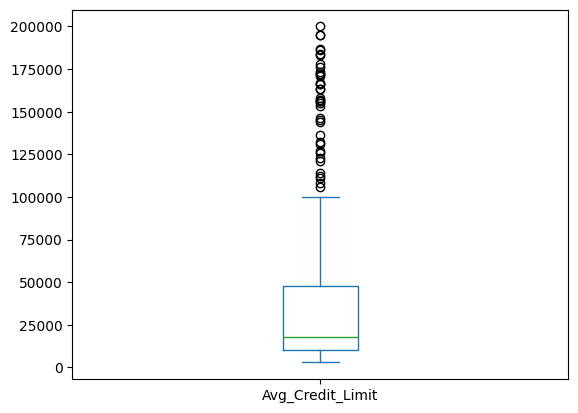

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

jumlah data sebelum dibuang outlier: 660
jumlah data setelah dibuang outlier: 621


<Axes: >

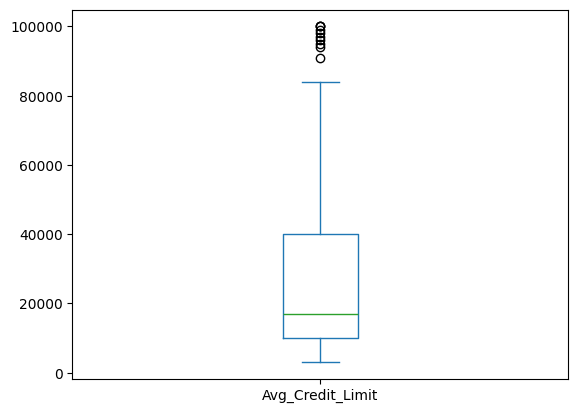

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    q1 = data_frame[kolom_outlier].quantile(0.25)
    q3 = data_frame[kolom_outlier].quantile(0.75)

    iqr = q3 - q1
    batas_atas = q3 + (1.5 * iqr)
    batas_bawah = q1 - (1.5 * iqr)

    data_clean = data_frame[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]
    
    return data_clean
df_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')
print("jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("jumlah data setelah dibuang outlier:", df_clean.shape[0])
df_clean['Avg_Credit_Limit'].plot(kind='box')

  File "c:\Program Files\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


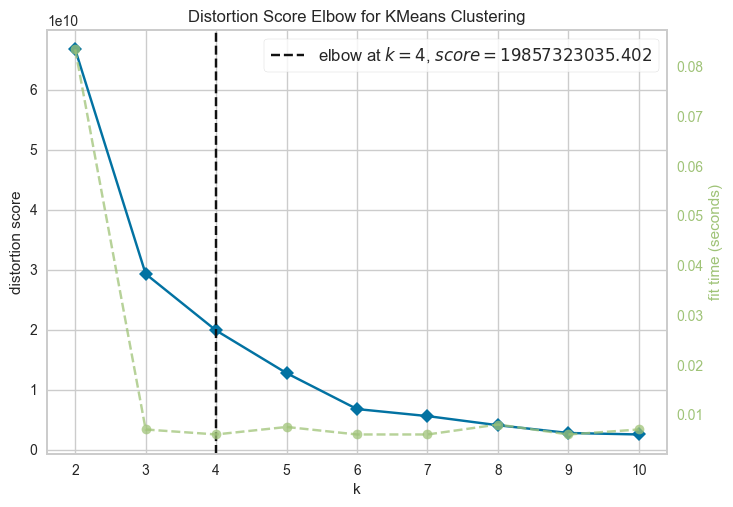

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=55)
vis = KElbowVisualizer(kMeansC, k=(2,11))
vis.fit(df_clean)
vis.show()

Silhouette Score for K-Means with 2 clusters: 0.7275517813087928
Silhouette Score for K-Means with 3 clusters: 0.7058100919802311
Silhouette Score for K-Means with 4 clusters: 0.7094276225317143
Silhouette Score for K-Means with 5 clusters: 0.6039773808643728
Silhouette Score for K-Means with 6 clusters: 0.6275885835827448
Silhouette Score for K-Means with 7 clusters: 0.5955373750239422
Silhouette Score for K-Means with 8 clusters: 0.5862921436038043
Silhouette Score for K-Means with 9 clusters: 0.6115561113872093
Silhouette Score for K-Means with 10 clusters: 0.6018924748174367


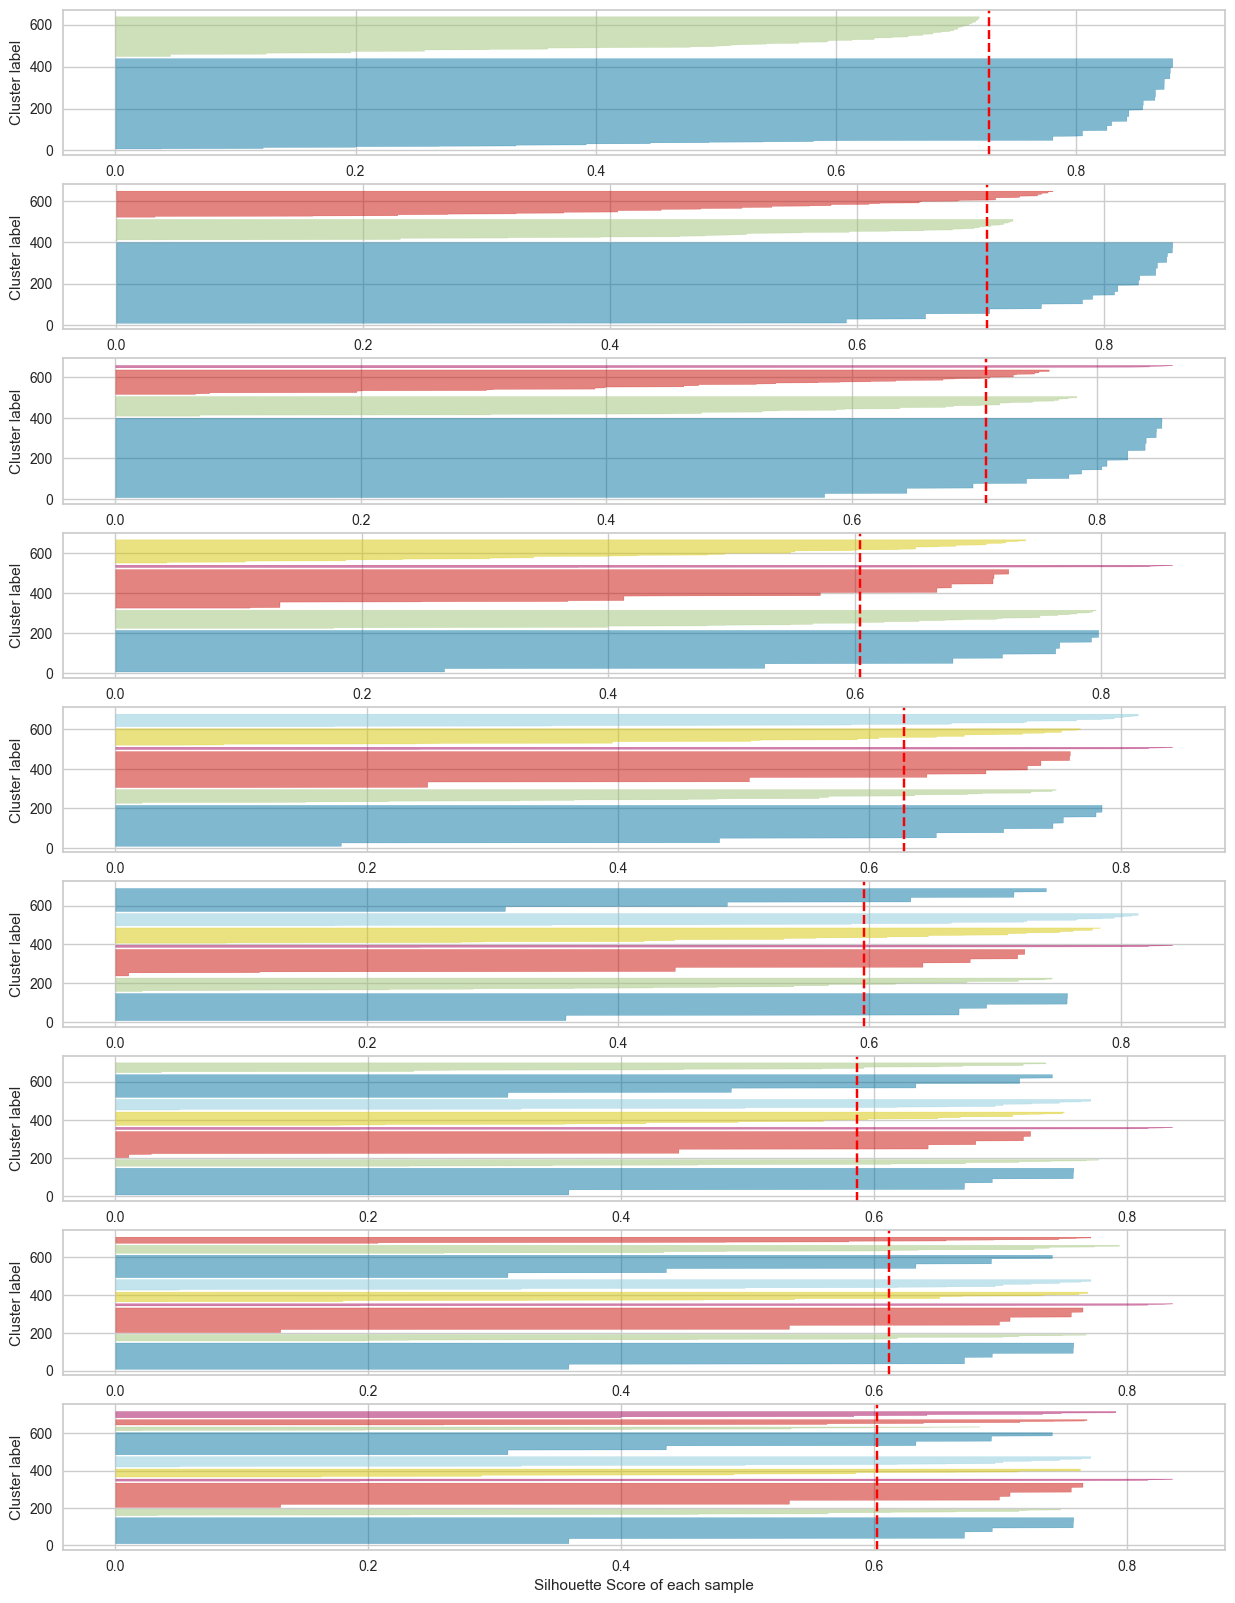

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))  

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=55)
    KM_clusters = kMeansC.fit_predict(df_clean)
    print("Silhouette Score for K-Means with", k, "clusters:", silhouette_score(df_clean, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(df_clean)
    
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")

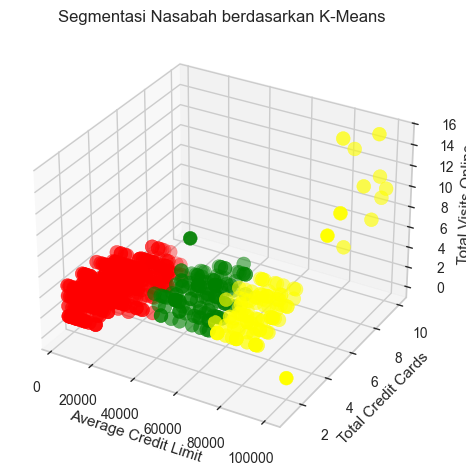

Silhouette Score K-Means: 0.706


In [8]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=55)
k_clusters = kmeans.fit_predict(df_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(df_clean['Avg_Credit_Limit'], df_clean['Total_Credit_Cards'], df_clean['Total_visits_online'],
           c=[cluster_colors[i] for i in k_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_clean, k_clusters))

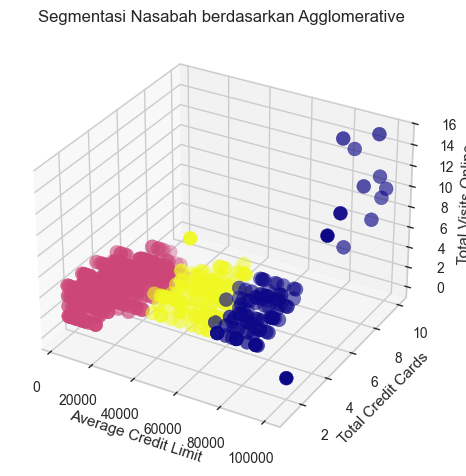

Silhouette Score K-Means: 0.705


In [9]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(df_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(df_clean['Avg_Credit_Limit'], df_clean['Total_Credit_Cards'], df_clean['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_clean, AGG_clusters))

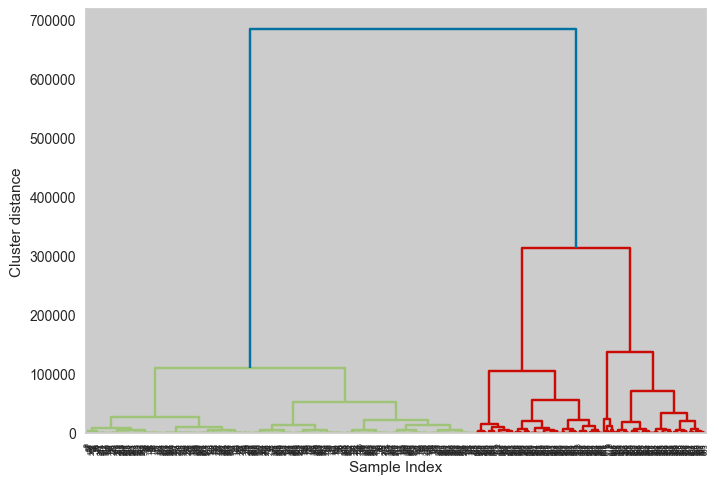

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(df_clean,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.ylabel("Cluster distance")
plt.show()


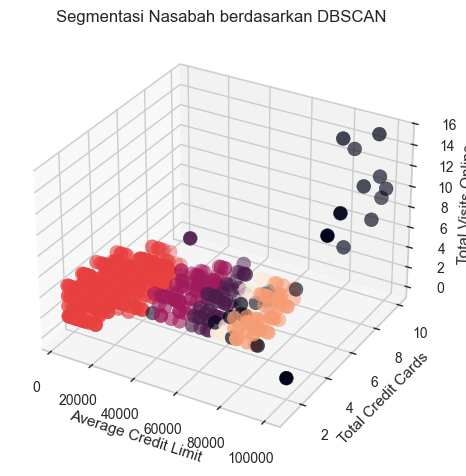

Silhouette Score K-Means: 0.657


In [11]:
DBSC = DBSCAN(min_samples=20,eps=2500)
DBSC_clusters = DBSC.fit_predict(df_clean)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket",256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(df_clean['Avg_Credit_Limit'], df_clean['Total_Credit_Cards'], df_clean['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_clean, DBSC_clusters))

In [12]:
import pickle

with open('kMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model Berhasil disimpan!")

Model Berhasil disimpan!
